In [ ]:
!python -m pip install jupyter notebook -U

In [8]:
import torch
import numpy as np

from transformers import ViTFeatureExtractor, ViTModel

model_name_or_path = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name_or_path)
                                 
feature_extractor


ViTFeatureExtractor {
  "do_normalize": true,
  "do_resize": true,
  "feature_extractor_type": "ViTFeatureExtractor",
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "size": 224
}

In [11]:
my_model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')

my_model

Downloading:   0%|          | 0.00/502 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/330M [00:00<?, ?B/s]

ViTModel(
  (embeddings): ViTEmbeddings(
    (patch_embeddings): PatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): ViTEncoder(
    (layer): ModuleList(
      (0): ViTLayer(
        (attention): ViTAttention(
          (attention): ViTSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (output): ViTSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (intermediate): ViTIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=True)
          (intermediate_act_fn): GELUActivation()
        )

In [5]:
dummy_image = torch.rand((3,224,224))
out = feature_extractor(dummy_image, return_tensors='pt')
out["pixel_values"].shape

torch.Size([1, 3, 224, 224])

In [27]:
out["pixel_values"]

tensor([[[[ 0.7725, -0.3176, -0.9216,  ..., -0.9294, -0.8353,  0.4980],
          [ 0.9843, -0.8118,  0.4118,  ..., -0.6235, -0.1608,  0.1686],
          [-0.3020, -0.8980, -0.5059,  ...,  0.3098,  0.8431, -0.5373],
          ...,
          [-0.5608, -0.7725,  0.0902,  ..., -0.9216,  0.6000,  0.6784],
          [ 0.1216,  0.8510,  0.8196,  ..., -0.5608,  0.0353, -0.1294],
          [ 0.5137,  0.5608, -0.5137,  ..., -0.4510,  0.7804, -0.4588]],

         [[ 0.7804,  0.5608, -0.3098,  ..., -0.7333, -0.9373,  0.5922],
          [-0.2078, -0.4980, -0.9059,  ...,  0.7961, -0.4980,  0.2941],
          [-0.8824, -0.0275, -0.2157,  ...,  0.1843,  0.6627,  0.2157],
          ...,
          [ 0.3333, -0.0902,  0.5373,  ...,  0.0510, -0.2784,  0.5529],
          [-0.7725, -0.4902, -0.3255,  ...,  0.6549, -0.4353,  0.0667],
          [-0.9137, -0.8588, -0.2863,  ..., -0.8275,  0.4510,  0.6157]],

         [[-0.0275, -0.7333, -0.8118,  ...,  0.3176, -0.5843,  0.8745],
          [-0.0118, -0.9373,  

In [7]:
from PIL import Image
import requests

url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)


In [12]:
image.size

(640, 480)

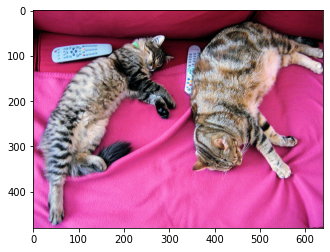

In [16]:
import matplotlib.pyplot as plt

plt.imshow(image)

In [35]:
from PIL import Image

# list_image = [Image.fromarray(np.random.rand(3,224,224)) for i in range(64)]
# inputs = feature_extractor(images=list_image, return_tensors="pt")

# The exact details of preprocessing of images during training/validation can be found here.
# Images are resized/rescaled to the same resolution (224x224) and 
# normalized across the RGB channels with 
# mean (0.5, 0.5, 0.5) and
# standard deviation (0.5, 0.5, 0.5).

from torchvision.transforms import (
    CenterCrop,
    Compose,
    InterpolationMode,
    Normalize,
    Resize,
    ToTensor,
)
image_size = 224
transform = Compose(
    [
        Resize(image_size, interpolation=InterpolationMode.BICUBIC),
        CenterCrop(image_size),
#         lambda image: image.convert("RGB"),
        ToTensor(),
        Normalize(
            (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)
        ),
    ]
)


img = np.random.rand((64, 3, 224, 224))

inputs["pixel_values"].shape
img = inputs["pixel_values"]

img = torch.squeeze(img)
img = torch.moveaxis(img, 0, -1)
img.shape
plt.imshow(img)

TypeError: Cannot handle this data type: (1, 1, 224), <f8

In [29]:
dummy_image = torch.rand((64, 3, 640,480))
dummy_image = torch.rand((1, 3, 640,480))
inputs = feature_extractor(images=dummy_image, return_tensors="pt")
outputs = my_model(**inputs)
vit_feat = outputs.last_hidden_state
vit_feat.shape

TypeError: Cannot handle this data type: (1, 1, 640, 480), |u1

In [47]:

from torchvision.transforms import (
    CenterCrop,
    Compose,
    InterpolationMode,
    Normalize,
    Resize,
    ToTensor,
)

image_size = 224
transform = Compose(
    [
        Resize(image_size, interpolation=InterpolationMode.BICUBIC),
        CenterCrop(image_size),
#         lambda image: image.convert("RGB"),
        ToTensor(),
        Normalize(
            (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)
        ),
    ]
)


# batch_img = np.random.rand(64, 3, 224, 224)
# Image.fromarray(np.uint8(np.random.rand(3,224,224) * 255)).convert('RGB')

list_image = [Image.fromarray(np.random.rand(224,224, 3) * 255, mode="RGB") for i in range(64)]

img = transform(list_image)

outputs = my_model(pixel_values=img)
vit_feat = outputs.last_hidden_state

vit_feat = torch.squeeze(vit_feat)
plt.imshow(vit_feat.detach().numpy())
vit_feat.shape

TypeError: img should be PIL Image. Got <class 'list'>

np_img.shape = (224, 224, 3)


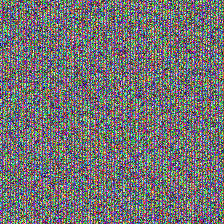

In [46]:
print(f"{np_img.shape = }")

# list_image = [ for i in range(64)]


In [25]:
outputs

BaseModelOutputWithPooling(last_hidden_state=tensor([[[ 0.1559,  0.0914,  0.1518,  ..., -0.3180, -0.0859, -0.0903],
         [-0.2254,  0.0864,  0.4752,  ..., -0.1781,  0.1726,  0.1334],
         [ 0.0444,  0.0677,  0.4199,  ..., -0.2576,  0.1191,  0.0130],
         ...,
         [-0.0153, -0.0396,  0.1684,  ..., -0.1672,  0.1869,  0.1025],
         [ 0.0249, -0.0382,  0.2046,  ...,  0.0517,  0.1489,  0.1320],
         [-0.1748, -0.0254,  0.2523,  ..., -0.1474,  0.1627,  0.1325]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[ 5.8399e-02, -3.0683e-01,  3.1213e-01, -1.1009e-01, -1.4752e-01,
          4.9735e-01, -1.5786e-01,  4.8658e-01, -4.6255e-01,  2.4344e-01,
          2.9941e-02,  2.8738e-01, -4.8914e-01, -9.9516e-03, -2.8943e-01,
          3.1443e-01, -6.2883e-02, -2.6637e-01, -3.9652e-01,  2.9896e-01,
          2.1507e-01, -1.9265e-01,  1.1786e-01,  2.5995e-01,  3.5440e-01,
         -3.7968e-01,  4.8320e-01, -3.5686e-01,  2.3996e-01, -8.0731e-01,
          1